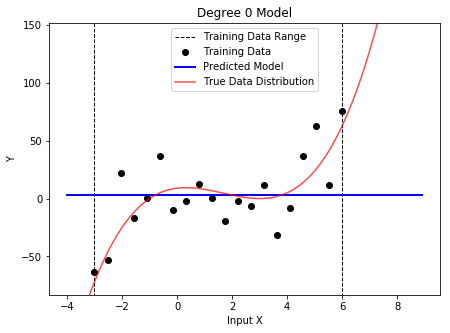

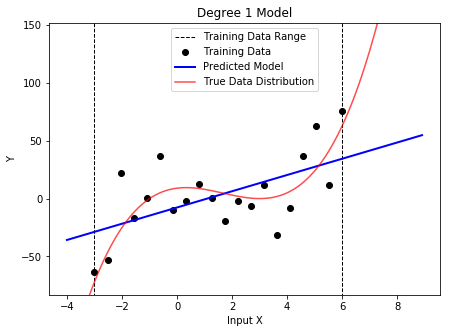

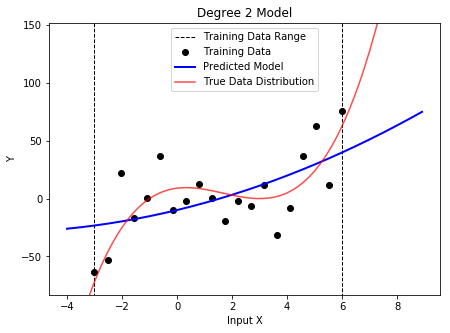

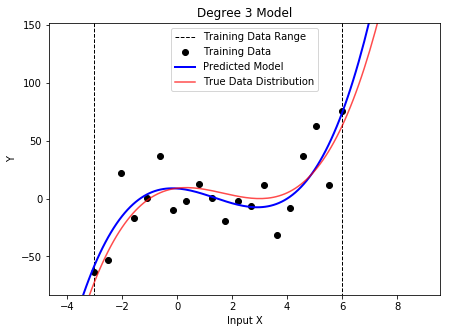

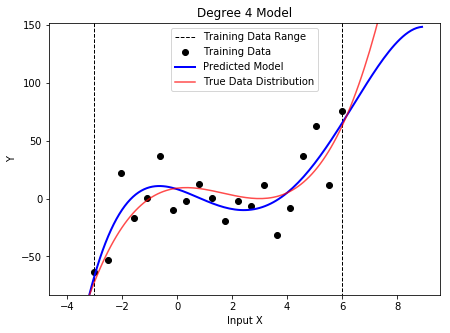

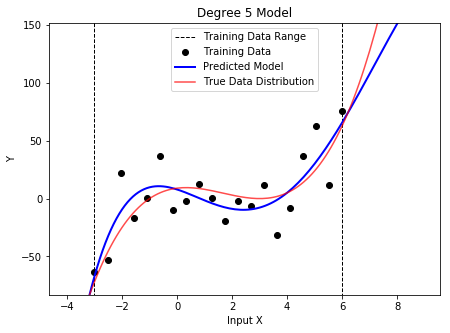

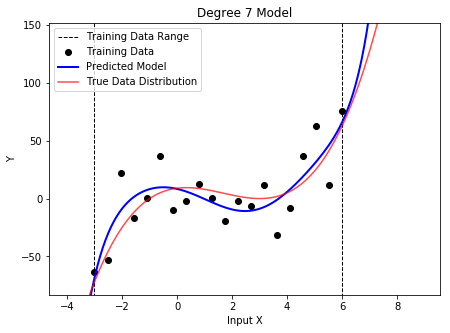

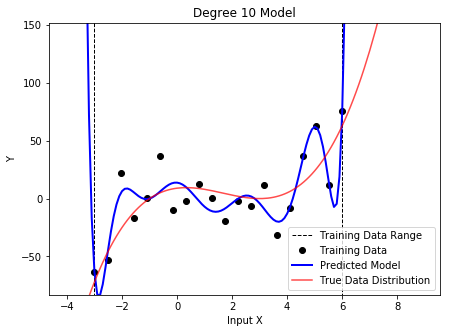

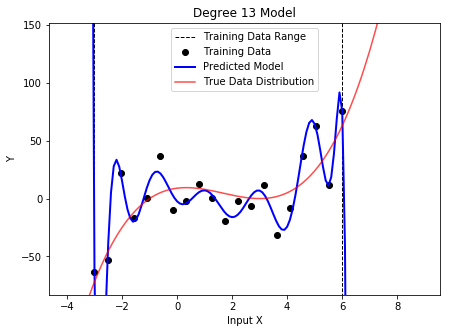

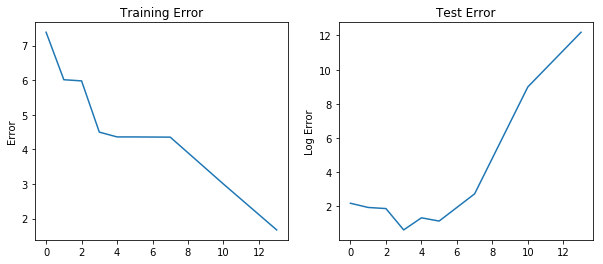

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
%matplotlib inline

np.random.seed(5)
trainDataRange = [-3,6]
trainDataRange = np.array(trainDataRange)

#Generate random training data within the trainDataRange
#Parameter for showing plots and number of samples
def generateTrainData(numSamples=20,showPlot=True):
    #Generate X data
    trainX = np.linspace(trainDataRange[0],trainDataRange[1],numSamples)
    trainX = np.sort(trainX)
    trueY = transform_x(trainX)
    #Add noise with variance 10
    noisyY = trueY+np.random.randn(numSamples)*20
    #Plot the data
    if showPlot:
        plt.plot(trainX,noisyY,'bo')
        plt.plot(trainDataRange, transform_x(trainDataRange), 'r-', lw=2)
        plt.ylabel("Noisy Y")
        plt.xlabel("Input X")
        plt.title("Clean X and Noisy Y from Linear Relationship")
        plt.ylim(ymin=min(noisyY-20),ymax=max(noisyY)*2)
        plt.show()
        plt.clf()
    return trainX,noisyY

def transform_x(inputX):
    return a*np.power(inputX,3)+b*np.power(inputX,2)+c*np.power(inputX,1)+d

#Validate the data on a larger range
#Default is -2 to 9
#Training region is denoted by dotted lines
def validate(model,trainX,noisyY,numSamples=500,dataRange=[-4,9],showPlot=True,coeffs={},fig_size=(7,5)):
    dataRange=np.arange(dataRange[0],dataRange[1],0.1)
    transformed_dataRange = transform_x(dataRange)
    #Generate x values from the data range
    inputX = np.random.random_sample((numSamples,))*(dataRange[-1]-dataRange[0])+dataRange[0]
    inputX = np.sort(inputX)
    trueY = transform_x(dataRange)
    predY=predict(model,dataRange)
    #Plot graphs
    if showPlot:
        #A bit of math to determine where to draw the dotted lines
        plt.figure(figsize = fig_size)
        #plt.axes().clear()
        coordX1 = [trainDataRange[0]]*2
        coordX2 = [trainDataRange[1]]*2
        minY = min(min(transformed_dataRange),min(predY))
        maxY = max(max(transformed_dataRange),max(predY))
        line1, = plt.plot(coordX1, [minY,maxY], 'k-', lw=1,linestyle="--", label="Training Data Range")
        plt.plot(coordX2, [minY,maxY], 'k-', lw=1,linestyle="--")
        #TrainX
        train, = plt.plot(trainX,noisyY,'ko', lw=2, label="Training Data")
        #Prediction
        pred, = plt.plot(dataRange,predY,'b-', lw=2, label="Predicted Model")
        #True Data
        trueData, = plt.plot(dataRange, transform_x(dataRange),'r-', lw=1.5, label="True Data Distribution",alpha=0.7)
        
        plt.ylabel("Y")
        plt.xlabel("Input X")
        plt.ylim(ymin=min(noisyY-20),ymax=max(noisyY)*2)
        title = "Degree " + str (len(model)-1)+ " Model"
        for i,key in enumerate(coeffs.keys()):
            title += " "+str(key)+"="+str(coeffs[key])
            if i<len(coeffs.keys())-1:
                title +=","
        plt.title(title)
        # Create a legend for the first line.
        legend = plt.legend(handles=[line1,train,pred,trueData])
        plt.show()
    return error(trueY,predY)
#     dataRange=np.arange(dataRange[0],dataRange[1],0.1)
#     transformed_dataRange = transform_x(dataRange)
#     predY=predict(model,dataRange)
#     #Plot graphs
#     if showPlot:
#         #A bit of math to determine where to draw the dotted lines
#         plt.figure(figsize = (7,5))
#         coordX1 = [trainDataRange[0]]*2
#         coordX2 = [trainDataRange[1]]*2
#         minY = min(min(transformed_dataRange),min(predY))
#         maxY = max(max(transformed_dataRange),max(predY))
#         line1, = plt.plot(coordX1, [minY,maxY], 'k-', lw=1,linestyle="--", label="Training Data Range")
#         plt.plot(coordX2, [minY,maxY], 'k-', lw=1,linestyle="--")
#         #TrainX
#         train, = plt.plot(trainX,noisyY,'ko', lw=2, label="Training Data")
#         #Prediction
#         pred, = plt.plot(dataRange,predY,'b-', lw=2, label="Predicted Model")
#         #True Data
#         trueData, = plt.plot(dataRange, transform_x(dataRange),'r-', lw=1.5, label="True Data Distribution",alpha=0.7)
#         plt.ylabel("Y")
#         plt.xlabel("Input X")
#         plt.ylim(ymin=min(noisyY-20),ymax=max(noisyY)*2)
#         title = "Degree " + str (len(model)-1)+ " Model"
#         for i,key in enumerate(coeffs.keys()):
#             title += " "+str(key)+"="+str(coeffs[key])
#             if i<len(coeffs.keys())-1:
#                 title +=","
#         plt.title(title)
#         # Create a legend for the first line.
#         legend = plt.legend(handles=[line1,train,pred,trueData])
#         plt.show()
#     return error(transformed_dataRange,predY)

#Train the data
def model(trainX,trainY,degree=1):
    #Creates the vandermonde matrix https://en.wikipedia.org/wiki/Vandermonde_matrix
    powers=np.vander(trainX,degree+1)
    A=powers
    #Solves the normal equation
    model = np.linalg.solve(A.T@A,A.T@trainY)
    return model

#Predicts given x values based on a model
def predict(model,x):
    degree=len(model)-1
    powers=np.vander(x,degree+1)
    return powers@model

#Determines the error between true Y values and predicted
def error(trueY,predY):
    return np.linalg.norm((trueY-predY))/len(trueY)

#Generates graphs of different degree models
#Plots training error and test error
def overfittingDemo(degrees = [0,1,2,3,4,5,7,10,13]):
    trainX,trainY = generateTrainData(showPlot=False)
    trainError = []
    testError = []
    #Iterate over all model orders
    for deg in degrees:
        currModel = model(trainX,trainY,degree=deg)
        predTrainY = predict(currModel,trainX)
        currTrainErr = error(trainY,predTrainY)
        currTestErr = validate(currModel,trainX,trainY,showPlot=True)
        trainError.append(currTrainErr)
        testError.append(currTestErr)
    
    #Plot the errors
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(degrees,trainError)
    plt.ylabel("Error")
    plt.title("Training Error")
    
    
    plt.subplot(1,2,2)
    plt.plot(degrees,np.log(testError))
    plt.title("Test Error")
    plt.ylabel("Log Error")
    plt.show()
    # Uncomment if you are curious about the actual error values
    # print("Training Errors:",trainError)
    # print("Test Errors:",testError)
    

#True model: y=x^3-3x^2+4
a = 1
b = -5
c = 3
d = 9

overfittingDemo()

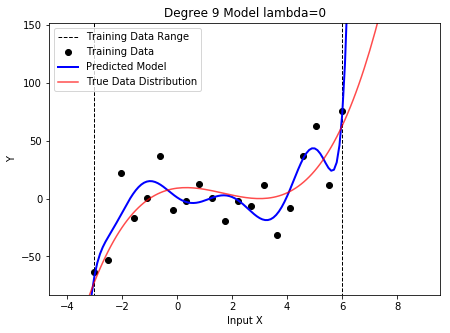

Training Error: 3.883
Test Error:  1512.197
Coefficients: 0.002929, -0.032448, 0.023732, 0.679693, -1.133530, -5.146226, 8.864224, 10.158636, -16.175270, 1.035607


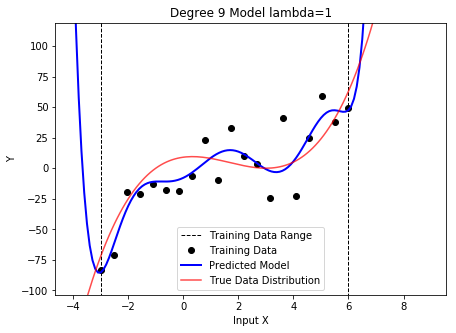

Training Error: 3.629
Test Error:  263.905
Coefficients: 0.000341, -0.000472, -0.043541, 0.198538, 0.575838, -3.262140, -1.525291, 9.713046, 10.679595, -7.861969


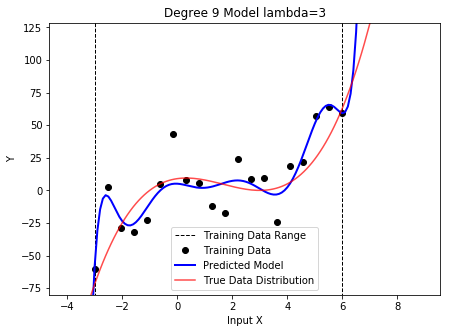

Training Error: 2.986
Test Error:  576.413
Coefficients: 0.002445, -0.037983, 0.150942, 0.273652, -2.482314, 1.403067, 9.571742, -10.856966, -1.174906, 5.142453


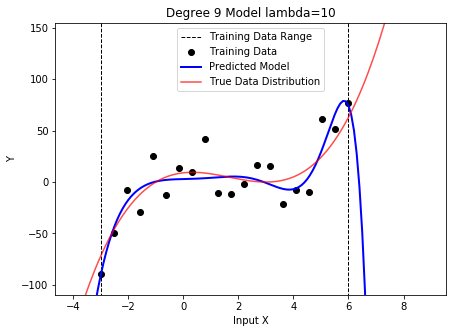

Training Error: 3.773
Test Error:  283.172
Coefficients: -0.000189, 0.000632, 0.008073, -0.019179, -0.013194, -0.464067, 1.193253, -0.123076, 0.645569, 2.905712


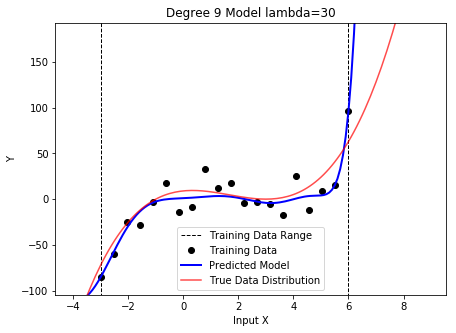

Training Error: 2.839
Test Error:  502.635
Coefficients: 0.000510, -0.003385, -0.017607, 0.137323, 0.118656, -1.602501, 1.325469, 0.696491, 1.459609, 1.029950


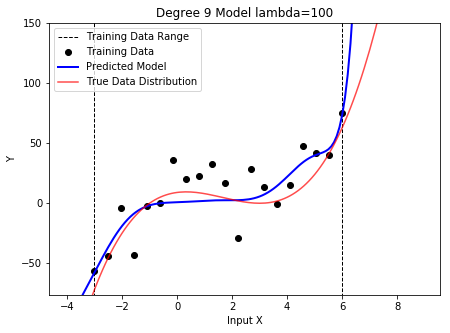

Training Error: 4.139
Test Error:  261.264
Coefficients: 0.000308, -0.002194, -0.009581, 0.078814, 0.073758, -0.874834, 0.963655, 0.104647, 0.867576, 0.849110


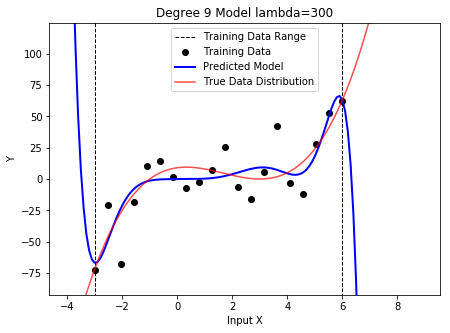

Training Error: 3.958
Test Error:  498.445
Coefficients: -0.000932, 0.011124, -0.025132, -0.112316, 0.421477, -0.226235, 0.317141, -0.174277, 0.105036, -0.009222


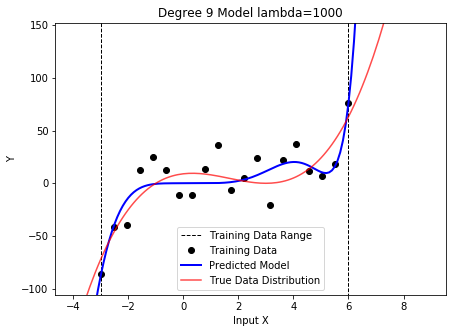

Training Error: 3.602
Test Error:  215.725
Coefficients: 0.000005, 0.001359, -0.008077, -0.038748, 0.270992, -0.231784, 0.041854, 0.002239, 0.013427, 0.048689


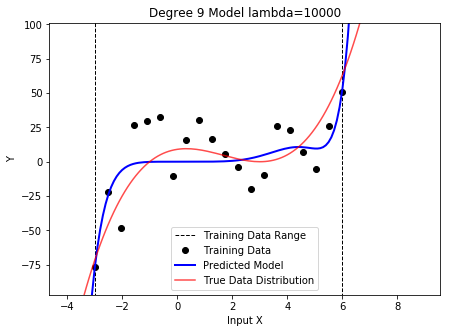

Training Error: 4.354
Test Error:  197.259
Coefficients: 0.000232, -0.002654, 0.010201, -0.023464, 0.058498, -0.031444, 0.003415, -0.004430, -0.001163, 0.009098


In [10]:
np.random.seed(5)
def ridgeDemo(lambdaCoeffs,maxDegree=9):
    for lambdaCoeff in lambdaCoeffs:
        trainX,trainY = generateTrainData(showPlot=False)
        currModel = ridgeModel(trainX,trainY,lambdaCoeff=lambdaCoeff,degree=maxDegree)
        predTrainY = predict(currModel,trainX)
        currTrainErr = error(trainY,predTrainY)
        currTestErr = validate(currModel,trainX,trainY,showPlot=True,coeffs={'lambda':lambdaCoeff})
        print("Training Error: %.3f"%(currTrainErr))
        print("Test Error:  %.3f"%(currTestErr))
        coeffs = "Coefficients: " 
        coeffs+=', '.join(['%-2f' for i in currModel])%tuple(currModel)
        print(coeffs)
    
def ridgeModel(trainX,trainY,lambdaCoeff,degree=10):
    powers = np.vander(trainX,degree+1)
    A = powers
    regularizationMatrix = lambdaCoeff*np.eye((A.shape[1]))
    model = np.linalg.solve(A.T@A+regularizationMatrix,A.T@trainY)
    return model

ridgeDemo(lambdaCoeffs = [0,1,3,10,30,100,300,1000,10000])

In [5]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension ;

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


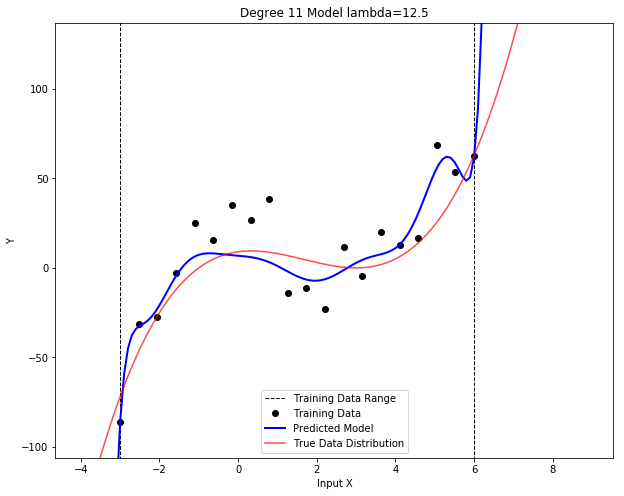

In [11]:
from ipywidgets import interactive
maxDegree=11
np.random.seed(13)
trainX,trainY = generateTrainData(showPlot=False)

def interactive_ridge(curr_lambda):
    currModel = ridgeModel(trainX,trainY,lambdaCoeff=curr_lambda,degree=maxDegree)
    currTestErr = validate(currModel,trainX,trainY,showPlot=True,coeffs={'lambda':curr_lambda},fig_size=(10,8))

interactive_plot = interactive(interactive_ridge, curr_lambda=(0.0,25, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot